In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.optimize import curve_fit
from scipy.stats import chi2
from __future__ import division

In [16]:
def getChiSq(y, y_fit, sigma):
    chi_sq = 0
    for i in range(len(y)):
        chi_sq += ( (y[i] - y_fit[i]) / sigma[i] )**2
    return chi_sq

In [17]:
def getRedChi2(y, y_fit, sigma, numPar=2):
    chi_sq = getChiSq(y, y_fit, sigma)
    red_chi_sq = chi_sq / (len(y) - numPar)
    p = chi2.pdf(chi_sq, df=(len(y) - numPar))
    print 'reduced chi-square =', '%.2f'%(red_chi_sq), 'p-value =', '%.2f'%(p)
    return red_chi_sq

In [18]:
def decay(x, tau, a):
    return a * np.exp(- x / tau)

In [7]:
tau = 2.2

In [12]:
r = np.random.random(20000)
t = - tau * np.log(r)

In [13]:
low = 3
high = 6
bins = 12
binWidth = (high - low) / bins

Text(0.5,1,'Signal (simulation)')

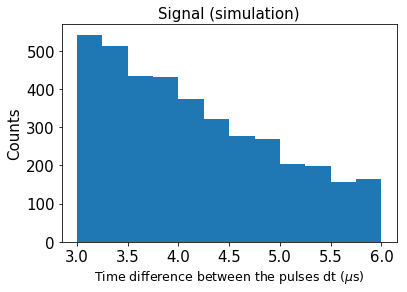

In [14]:
plt.hist(t, bins = bins, range=(low, high))
plt.xlabel('Time difference between the pulses dt ($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal (simulation)', fontsize=15)

In [19]:
y, binEdges = np.histogram(t, bins=bins, range=(low, high))
x = []
for i in range(len(y)):
    x.append((binEdges[i] + binEdges[i+1]) / 2)
x = np.asarray(x)

In [20]:
popt, pcov = curve_fit(decay, x, y) # pcov is the covariance matrix for the fit parameters

print 'Parameters of binned exponential decay fit y = a * exp( -x / tau):'
print ' tau =','%.3f'%(popt[0]),'micro sec'
print ' a =','%.3f'%(popt[1])
print ' error on tau =', '%.4f'%(np.sqrt(pcov[0][0])), 'micro sec'
print ' error on a =', '%.4f'%(np.sqrt(pcov[1][1]))

Parameters of binned exponential decay fit y = a * exp( -x / tau):
 tau = 2.184 micro sec
 a = 2355.523
 error on tau = 0.1007 micro sec
 error on a = 196.7416


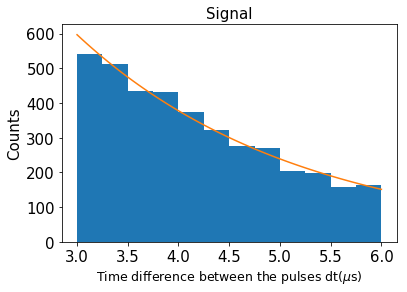

In [22]:
arange = np.arange(low, high+0.05, 0.05)
plt.hist(binEdges[:-1], binEdges, weights=y)
plt.plot(arange, decay(arange,popt[0],popt[1]))#,label=r'$y= (1.04 \pm 0.57) 10^4 \exp[-x/(1.95 \pm 0.05)]$'+' \n reduced $\chi^2$ = 1.57',linewidth=3,alpha=.5,color='r')
plt.xlabel('Time difference between the pulses dt($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper right')

In [23]:
sigma = np.sqrt(y)
getRedChi2(y, decay(x, popt[0], popt[1]), sigma)

reduced chi-square = 1.17 p-value = 0.07


1.168907477137354